In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# melakukan ekstraksi pada file zip
from google.colab import drive
drive.mount('/content/drive')
import zipfile,os

local_zip = '/content/drive/My Drive/Colab Notebooks/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Test')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
os.listdir('/tmp/Train')

['scissors', 'rock', 'paper']

In [6]:
os.listdir('/tmp/Test')

['scissors', 'rock', 'paper']

In [0]:
#direktori train
kertas_dir = os.path.join(train_dir, 'paper')
gunting_dir = os.path.join(train_dir, 'scissors')
batu_dir = os.path.join(train_dir, 'rock')

#direktori val
kertas = os.path.join(validation_dir, 'paper')
gunting = os.path.join(validation_dir, 'scissors')
batu = os.path.join(validation_dir, 'rock')



In [0]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode= 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        class_mode= 'categorical')

Found 1650 images belonging to 3 classes.
Found 538 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])


In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/50
25/25 - 2s - loss: 1.2123 - accuracy: 0.3800 - val_loss: 1.0786 - val_accuracy: 0.3812
Epoch 2/50
25/25 - 2s - loss: 1.0904 - accuracy: 0.3900 - val_loss: 1.0359 - val_accuracy: 0.3688
Epoch 3/50
25/25 - 2s - loss: 0.9890 - accuracy: 0.6000 - val_loss: 0.7921 - val_accuracy: 0.7727
Epoch 4/50
25/25 - 2s - loss: 0.7407 - accuracy: 0.7200 - val_loss: 0.6602 - val_accuracy: 0.6687
Epoch 5/50
25/25 - 2s - loss: 0.7430 - accuracy: 0.7500 - val_loss: 0.4481 - val_accuracy: 0.8813
Epoch 6/50
25/25 - 2s - loss: 0.5922 - accuracy: 0.8000 - val_loss: 0.5144 - val_accuracy: 0.8571
Epoch 7/50
25/25 - 2s - loss: 0.4270 - accuracy: 0.7800 - val_loss: 0.5245 - val_accuracy: 0.7688
Epoch 8/50
25/25 - 2s - loss: 0.6756 - accuracy: 0.7300 - val_loss: 0.3918 - val_accuracy: 0.8875
Epoch 9/50
25/25 - 2s - loss: 0.2744 - accuracy: 0.9100 - val_loss: 0.9563 - val_accuracy: 0.7662
Epoch 10/50
25/25 - 2s - loss: 0.4609 - accuracy: 0.8100 - val_loss: 0.2418 - val_accuracy: 0.9125
Epoch 11/50
25/25 -

**Grafik Training and Validation Accuracy**

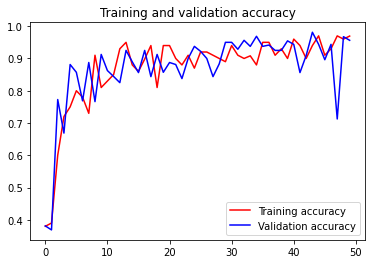

<Figure size 432x288 with 0 Axes>

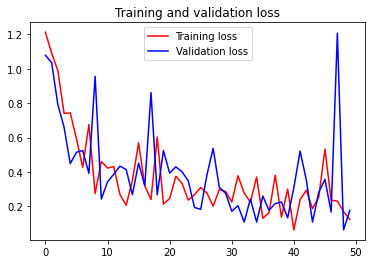

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Using TensorFlow backend.


Saving TklTtKIVRWh2HA94.png to TklTtKIVRWh2HA94.png
Gunting


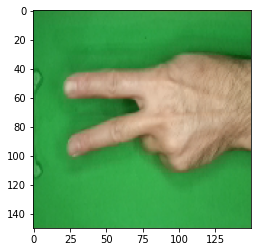

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
labels = ["Kertas","Batu","Gunting"]
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = labels[classes.argmax()]
  #print(fn)
  #print(classes)
  print(result)
